In [ ]:
#Determine peak ages by position

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
#all players 1980-2022
df = pd.read_csv('all_1980-2022.csv')
df.head(10)

,Rk,Player,WAR,PA,WAR.1,Season,Age,Team,Lg,G,...,WAA,oWAR,dWAR,Rbat,Rdp,Rbaser,Rbaser + Rdp,Rfield,Pos,Pos_Cat
0,SS_1,Cal Ripken Jr.,11.5,717,11.5,1991,30,BAL,AL,162,...,9.2,9.2,3.5,56,-1,1,0,23,*6,SS
1,SS_2,Robin Yount,10.6,704,10.6,1982,26,MIL,AL,156,...,8.4,9.9,1.9,59,-1,8,7,8,*6/HD,SS
2,SS_3,Álex Rodríguez,10.4,672,10.4,2000,24,SEA,AL,148,...,8.1,8.9,2.4,58,1,6,7,16,*6,SS
3,SS_4,Cal Ripken Jr.,10.0,716,10.0,1984,23,BAL,AL,162,...,7.8,7.7,3.6,41,-2,2,1,23,*6,SS
4,SS_5,Álex Rodríguez,9.4,677,9.4,1996,20,SEA,AL,146,...,7.2,8.5,1.8,58,-1,3,3,8,*6/H,SS
5,SS_6,Álex Rodríguez,8.8,725,8.8,2002,26,TEX,AL,162,...,6.4,8.7,1.1,51,-1,5,4,2,*6/H,SS
6,SS_7,Álex Rodríguez,8.5,748,8.5,1998,22,SEA,AL,161,...,6.1,7.8,1.7,38,3,5,8,8,*6/D,SS
7,SS_8,Marcus Semien,8.5,747,8.5,2019,28,OAK,AL,162,...,6.1,7.6,1.8,44,0,2,2,7,*6,SS
8,SS_9,Álex Rodríguez,8.4,715,8.4,2003,27,TEX,AL,161,...,5.9,7.6,1.7,41,0,3,4,8,*6/HD,SS
9,SS_10,Álex Rodríguez,8.3,732,8.3,2001,25,TEX,AL,162,...,5.9,9.2,0.1,58,-1,5,4,-9,*6/D,SS


In [80]:
#add player id
df['PlayerID'] = df['Player'].str.replace(" ", "") +"_"+ df['Pos_Cat']
df.head(10)

,Rk,Player,WAR,PA,WAR.1,Season,Age,Team,Lg,G,...,oWAR,dWAR,Rbat,Rdp,Rbaser,Rbaser + Rdp,Rfield,Pos,Pos_Cat,PlayerID
0,SS_1,Cal Ripken Jr.,11.5,717,11.5,1991,30,BAL,AL,162,...,9.2,3.5,56,-1,1,0,23,*6,SS,CalRipkenJr._SS
1,SS_2,Robin Yount,10.6,704,10.6,1982,26,MIL,AL,156,...,9.9,1.9,59,-1,8,7,8,*6/HD,SS,RobinYount_SS
2,SS_3,Álex Rodríguez,10.4,672,10.4,2000,24,SEA,AL,148,...,8.9,2.4,58,1,6,7,16,*6,SS,ÁlexRodríguez_SS
3,SS_4,Cal Ripken Jr.,10.0,716,10.0,1984,23,BAL,AL,162,...,7.7,3.6,41,-2,2,1,23,*6,SS,CalRipkenJr._SS
4,SS_5,Álex Rodríguez,9.4,677,9.4,1996,20,SEA,AL,146,...,8.5,1.8,58,-1,3,3,8,*6/H,SS,ÁlexRodríguez_SS
5,SS_6,Álex Rodríguez,8.8,725,8.8,2002,26,TEX,AL,162,...,8.7,1.1,51,-1,5,4,2,*6/H,SS,ÁlexRodríguez_SS
6,SS_7,Álex Rodríguez,8.5,748,8.5,1998,22,SEA,AL,161,...,7.8,1.7,38,3,5,8,8,*6/D,SS,ÁlexRodríguez_SS
7,SS_8,Marcus Semien,8.5,747,8.5,2019,28,OAK,AL,162,...,7.6,1.8,44,0,2,2,7,*6,SS,MarcusSemien_SS
8,SS_9,Álex Rodríguez,8.4,715,8.4,2003,27,TEX,AL,161,...,7.6,1.7,41,0,3,4,8,*6/HD,SS,ÁlexRodríguez_SS
9,SS_10,Álex Rodríguez,8.3,732,8.3,2001,25,TEX,AL,162,...,9.2,0.1,58,-1,5,4,-9,*6/D,SS,ÁlexRodríguez_SS


In [81]:
#eliminate players who have less than 3 seasons at position
df2 = df.groupby('PlayerID').filter(lambda x : len(x)>2)

In [82]:
#check
df2['PlayerID'].value_counts()

DerekJeter_SS         18
AdriánBeltré_3B       17
RickeyHenderson_OF    17
BarryBonds_OF         16
CalRipkenJr._SS       14
                      ..
CésarIzturis_SS        3
RayKnight_3B           3
ChrisJohnson_3B        3
MichaelYoung_3B        3
GeorgeBrett_DH         3
Name: PlayerID, Length: 749, dtype: int64

In [83]:
#reset index
df2_1 = df2.reset_index(drop=True)

In [84]:
#identify the peak seasons for each player
df3 = df2_1.loc[df2_1.groupby("PlayerID")["WAR"].idxmax()]

In [97]:
#SP

In [98]:
#all sp 1980-2022
dfP = pd.read_csv('p_1980-2022.csv')
dfP.head(10)

,Rk,Player,WAR,GS,WAR.1,Season,Age,Team,Lg,W,...,WHIP,H9,HR9,BB9,SO9,SO/BB,WAR.2,WAA,Pos,Pos_Cat
0,1,Dwight Gooden,12.2,35,12.2,1985,20,NYM,NL,24,...,0.965,6.4,0.4,2.2,8.7,3.88,12.2,9.8,1,SP
1,2,Roger Clemens,11.9,34,11.9,1997,34,TOR,AL,21,...,1.030,7.0,0.3,2.3,10.0,4.29,11.9,9.4,1,SP
2,3,Pedro Martínez,11.7,29,11.7,2000,28,BOS,AL,18,...,0.737,5.3,0.7,1.3,11.8,8.88,11.7,9.7,NaN,SP
3,4,Randy Johnson,10.7,35,10.7,2002,38,ARI,NL,24,...,1.031,6.8,0.9,2.5,11.6,4.70,10.7,8.7,1,SP
4,5,Roger Clemens,10.4,31,10.4,1990,27,BOS,AL,21,...,1.082,7.6,0.3,2.1,8.2,3.87,10.4,8.4,NaN,SP
5,6,Zack Greinke,10.4,33,10.4,2009,25,KCR,AL,16,...,1.073,7.7,0.4,2.0,9.5,4.75,10.4,8.3,1,SP
6,7,Steve Carlton,10.2,38,10.2,1980,35,PHI,NL,24,...,1.095,7.2,0.4,2.7,8.5,3.18,10.2,7.6,1,SP
7,8,Randy Johnson,10.1,34,10.1,2001,37,ARI,NL,21,...,1.009,6.5,0.7,2.6,13.4,5.24,10.1,8.2,1,SP
8,9,Pedro Martínez,9.8,29,9.8,1999,27,BOS,AL,23,...,0.923,6.8,0.4,1.6,13.2,8.46,9.8,7.8,1,SP
9,10,Greg Maddux,9.7,28,9.7,1995,29,ATL,NL,19,...,0.811,6.3,0.3,1.0,7.8,7.87,9.7,8.1,1,SP


In [99]:
#add player id
dfP['PlayerID'] = dfP['Player'].str.replace(" ", "") +"_"+ dfP['Pos_Cat']
dfP.head(10)

,Rk,Player,WAR,GS,WAR.1,Season,Age,Team,Lg,W,...,H9,HR9,BB9,SO9,SO/BB,WAR.2,WAA,Pos,Pos_Cat,PlayerID
0,1,Dwight Gooden,12.2,35,12.2,1985,20,NYM,NL,24,...,6.4,0.4,2.2,8.7,3.88,12.2,9.8,1,SP,DwightGooden_SP
1,2,Roger Clemens,11.9,34,11.9,1997,34,TOR,AL,21,...,7.0,0.3,2.3,10.0,4.29,11.9,9.4,1,SP,RogerClemens_SP
2,3,Pedro Martínez,11.7,29,11.7,2000,28,BOS,AL,18,...,5.3,0.7,1.3,11.8,8.88,11.7,9.7,NaN,SP,PedroMartínez_SP
3,4,Randy Johnson,10.7,35,10.7,2002,38,ARI,NL,24,...,6.8,0.9,2.5,11.6,4.70,10.7,8.7,1,SP,RandyJohnson_SP
4,5,Roger Clemens,10.4,31,10.4,1990,27,BOS,AL,21,...,7.6,0.3,2.1,8.2,3.87,10.4,8.4,NaN,SP,RogerClemens_SP
5,6,Zack Greinke,10.4,33,10.4,2009,25,KCR,AL,16,...,7.7,0.4,2.0,9.5,4.75,10.4,8.3,1,SP,ZackGreinke_SP
6,7,Steve Carlton,10.2,38,10.2,1980,35,PHI,NL,24,...,7.2,0.4,2.7,8.5,3.18,10.2,7.6,1,SP,SteveCarlton_SP
7,8,Randy Johnson,10.1,34,10.1,2001,37,ARI,NL,21,...,6.5,0.7,2.6,13.4,5.24,10.1,8.2,1,SP,RandyJohnson_SP
8,9,Pedro Martínez,9.8,29,9.8,1999,27,BOS,AL,23,...,6.8,0.4,1.6,13.2,8.46,9.8,7.8,1,SP,PedroMartínez_SP
9,10,Greg Maddux,9.7,28,9.7,1995,29,ATL,NL,19,...,6.3,0.3,1.0,7.8,7.87,9.7,8.1,1,SP,GregMaddux_SP


In [100]:
#eliminate players who have less than 3 seasons at position
dfP_2 = dfP.groupby('PlayerID').filter(lambda x : len(x)>2)

In [261]:
#check
dfP_2['PlayerID'].value_counts()

RogerClemens_SP     21
GregMaddux_SP       21
TomGlavine_SP       20
MikeMussina_SP      17
CCSabathia_SP       17
                    ..
BrianHolman_SP       3
OliverPérez_SP       3
MerrillKelly_SP      3
DennisLeonard_SP     3
RogerPavlik_SP       3
Name: PlayerID, Length: 524, dtype: int64

In [101]:
#reset index
dfP_2_1 = dfP_2.reset_index(drop=True)

In [103]:
#identify the peak seasons for each pitcher
dfP_3 = dfP_2_1.loc[dfP_2_1.groupby("PlayerID")["WAR"].idxmax()]

In [107]:
#build position df
df_pos = df3[['Age','Pos_Cat']].reset_index(drop=True)
df_pos

,Age,Pos_Cat
0,26,C
1,30,3B
2,27,2B
3,26,OF
4,24,OF
...,...,...
744,31,3B
745,24,SS
746,27,OF
747,25,SS


In [108]:
#build pitcher df
df_p = dfP_3[['Age','Pos_Cat']].reset_index(drop=True)
df_p

,Age,Pos_Cat
0,32,SP
1,29,SP
2,29,SP
3,25,SP
4,29,SP
...,...,...
519,24,SP
520,23,SP
521,25,SP
522,31,SP


In [139]:
#combine dfs
df_all = pd.concat([df_pos,df_p])
df_all

,Age,Pos_Cat
0,26,C
1,30,3B
2,27,2B
3,26,OF
4,24,OF
...,...,...
519,24,SP
520,23,SP
521,25,SP
522,31,SP


In [140]:
#group by Age, Position
df_grp = df_all.groupby(['Age','Pos_Cat']).value_counts().reset_index()
df_grp = pd.DataFrame(df_grp)
df_grp = df_grp.rename(columns={'Pos_Cat':'Position','Age':'Age',0:'Count'})
df_grp


,Age,Position,Count
0,20,OF,1
1,20,SP,1
2,21,OF,1
3,21,SP,3
4,22,2B,3
...,...,...,...
120,40,SP,2
121,41,SP,1
122,42,C,1
123,44,1B,1


In [269]:
#for position counts
df_grp_pos = pd.DataFrame(df_all['Pos_Cat'])
df_grp_pos = df_grp_pos.groupby(['Pos_Cat']).value_counts().reset_index()
df_grp_pos = df_grp_pos.rename(columns={'Pos_Cat':'Position',0:'Count'})
df_grp_pos

,Position,Count
0,1B,99
1,2B,94
2,3B,98
3,C,42
4,DH,25
5,OF,285
6,SP,524
7,SS,106


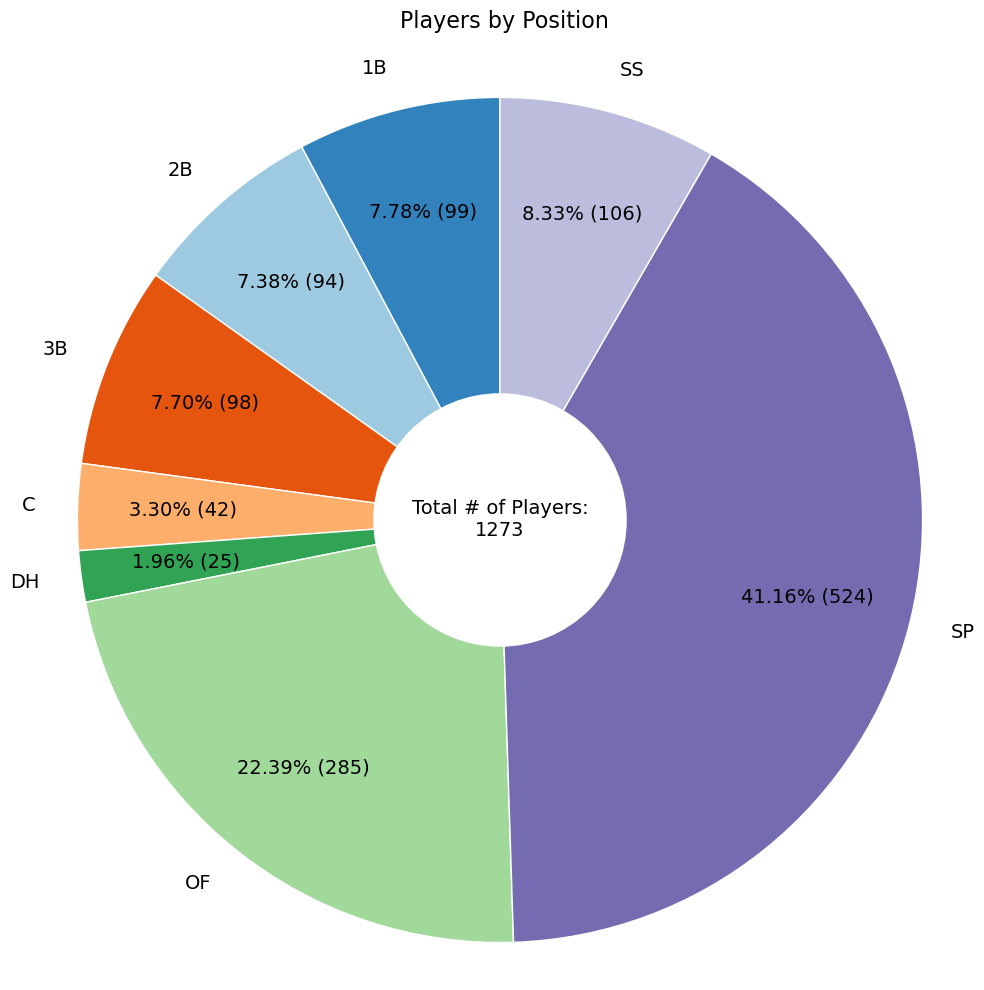

In [293]:
#pie for position counts
number_outside_colors = len(df_grp_pos.Position.unique())
outside_color_ref_number = np.arange(number_outside_colors)*2


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

colormap = plt.get_cmap("tab20c")
outer_colors = colormap(outside_color_ref_number)

all_counts = df_grp_pos.Count.sum()

df_grp_pos.groupby(['Position'])['Count'].sum().plot(
        kind='pie',radius=1, colors = outer_colors, pctdistance=0.75,
        labeldistance = 1.1, wedgeprops = dict(edgecolor='white'),textprops={'fontsize':14},
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p,(p/100)*all_counts),
        startangle=90)

hole = plt.Circle((0,0), 0.3, fc='white')
fig1 = plt.gcf()
fig1.gca().add_artist(hole)

ax.yaxis.set_visible(False)
plt.title('Players by Position\n', fontsize=16)

ax.axis('equal')
plt.tight_layout()

ax.text(0,0, 'Total # of Players:\n' + str(all_counts), size=14, ha='center', va='center')

plt.show()


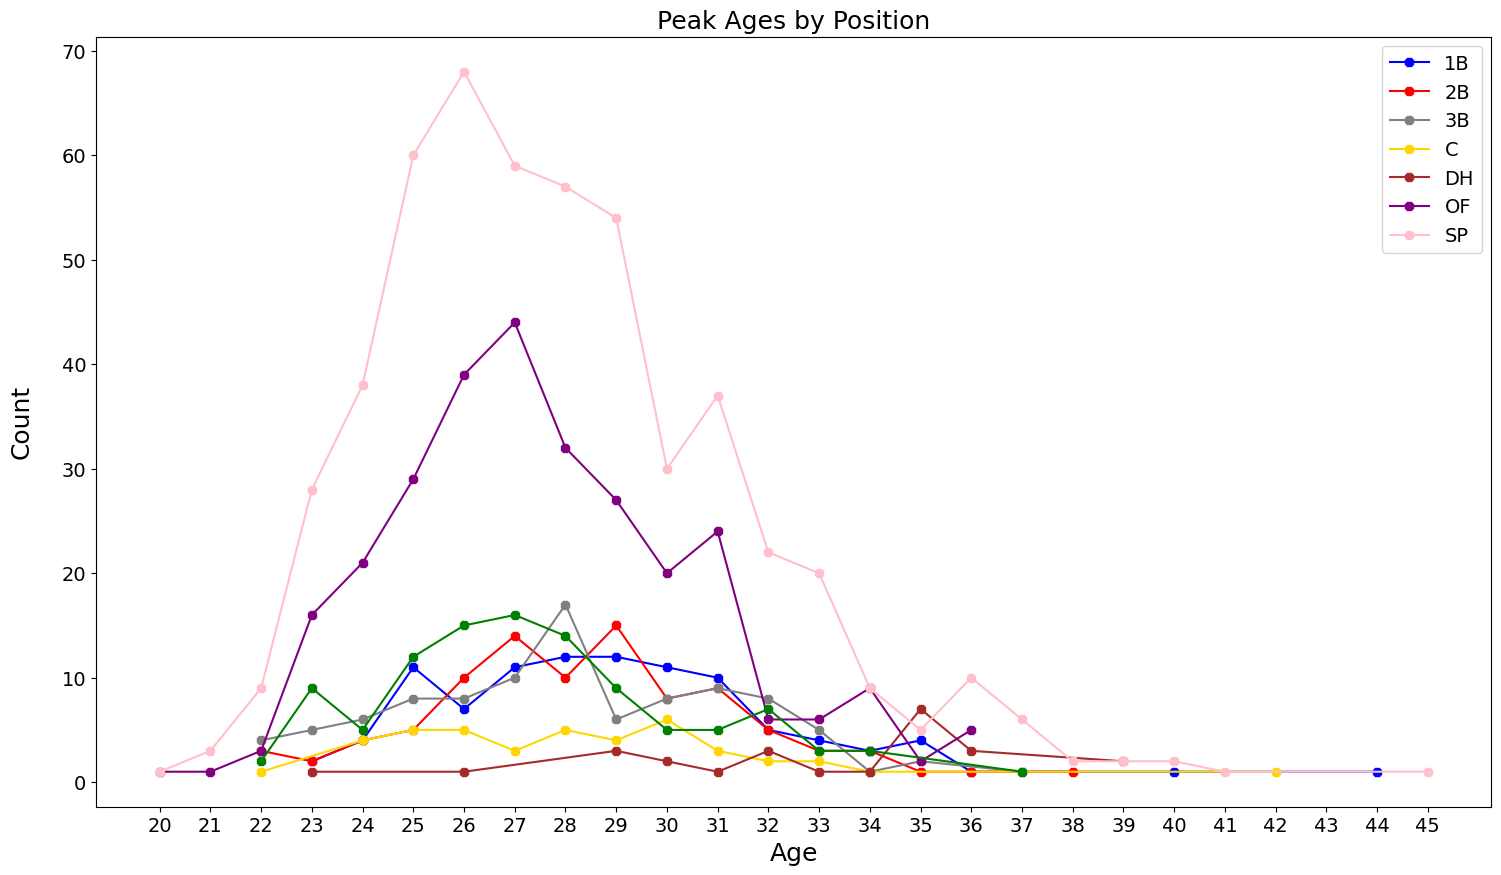

In [260]:
#plot everything

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,1,1)

my_colors = {'1B':'blue',
            '2B':'red',
            'SS':'green',
            '3B':'gray',
            'OF':'purple',
            'C':'gold',
            'DH':'brown',
            'SP':'pink'}

for key, grp in df_grp.groupby(['Position']):
    grp.plot(ax=ax, kind='line', x='Age', y='Count', color = my_colors[key], label=key, marker='8')

plt.title('Peak Ages by Position', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Count', fontsize=18, labelpad=20)
ax.tick_params(axis='x',labelsize=14, rotation=0)
ax.tick_params(axis='y',labelsize=14, rotation=0)

ax.set_xticks(range(20,46))

handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[1],handles[2],handles[3],handles[4],handles[5],handles[6]]
labels = [labels[0],   labels[1], labels[2], labels[3], labels[4], labels[5], labels[6]]
plt.legend(handles, labels, loc='best', fontsize=14, ncol=1)


plt.show()

In [170]:
#group by position value counts
df_grp2 = df_all.groupby('Pos_Cat').value_counts().reset_index()
df_grp2 = df_grp2.rename(columns={'Pos_Cat':'Position','Age':'Age',0:'Count'})


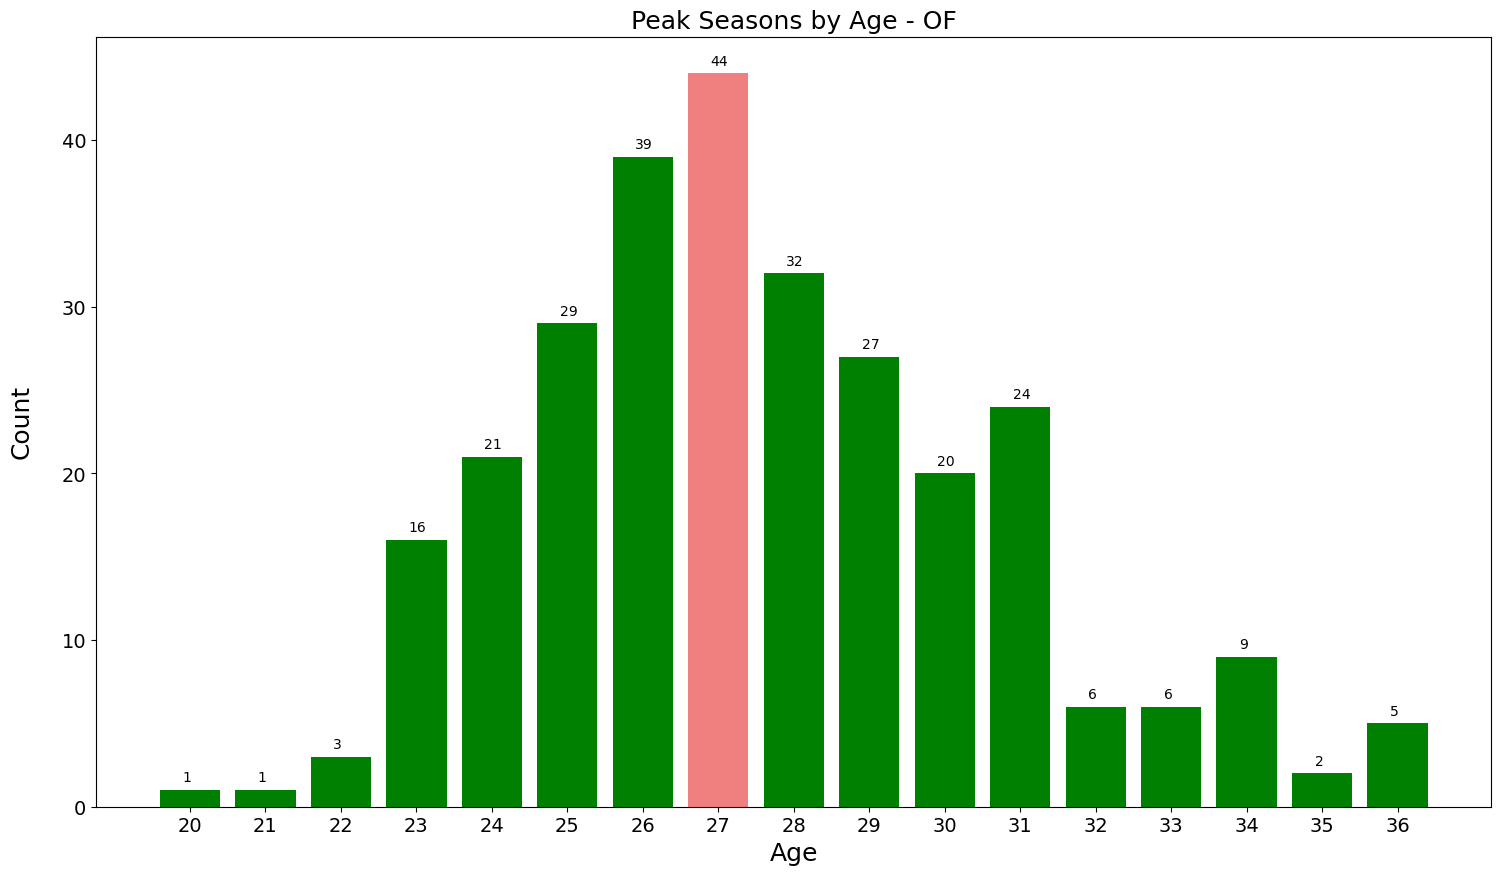

In [248]:
#plot OF
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='OF']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='OF']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='OF']['Age'],df_grp2[df_grp2['Position']=='OF']['Count'], label='Count', color=colors)
ax1.set_title('Peak Seasons by Age - OF', fontsize=18)
ax1.set_xlabel('Age', fontsize=18)
ax1.set_ylabel('Count', fontsize=18, labelpad=20)
ax1.tick_params(axis='x',labelsize=14, rotation=0)
ax1.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height() + .5))
ax1.set_xticks(range(df_grp2[df_grp2['Position']=='OF']['Age'].min(),df_grp2[df_grp2['Position']=='OF']['Age'].max()+1))

plt.show()

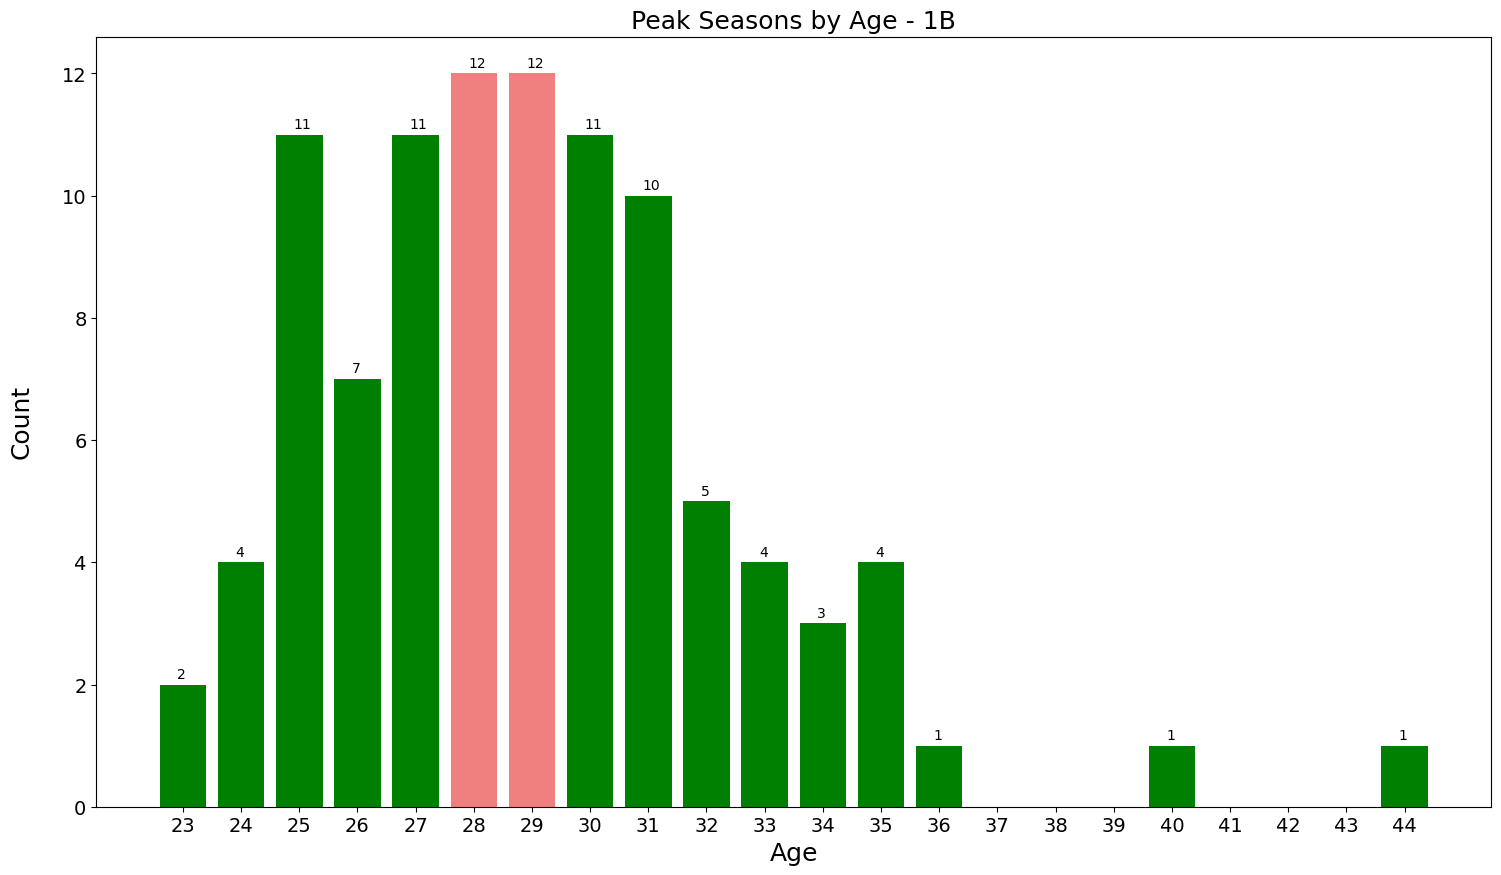

In [245]:
#plot 1B
fig = plt.figure(figsize=(18,10))
ax2 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='1B']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='1B']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='1B']['Age'],df_grp2[df_grp2['Position']=='1B']['Count'], label='Count', color=colors)
ax2.set_title('Peak Seasons by Age - 1B', fontsize=18)
ax2.set_xlabel('Age', fontsize=18)
ax2.set_ylabel('Count', fontsize=18, labelpad=20)
ax2.tick_params(axis='x',labelsize=14, rotation=0)
ax2.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax2.set_xticks(range(df_grp2[df_grp2['Position']=='1B']['Age'].min(),df_grp2[df_grp2['Position']=='1B']['Age'].max()+1))

plt.show()

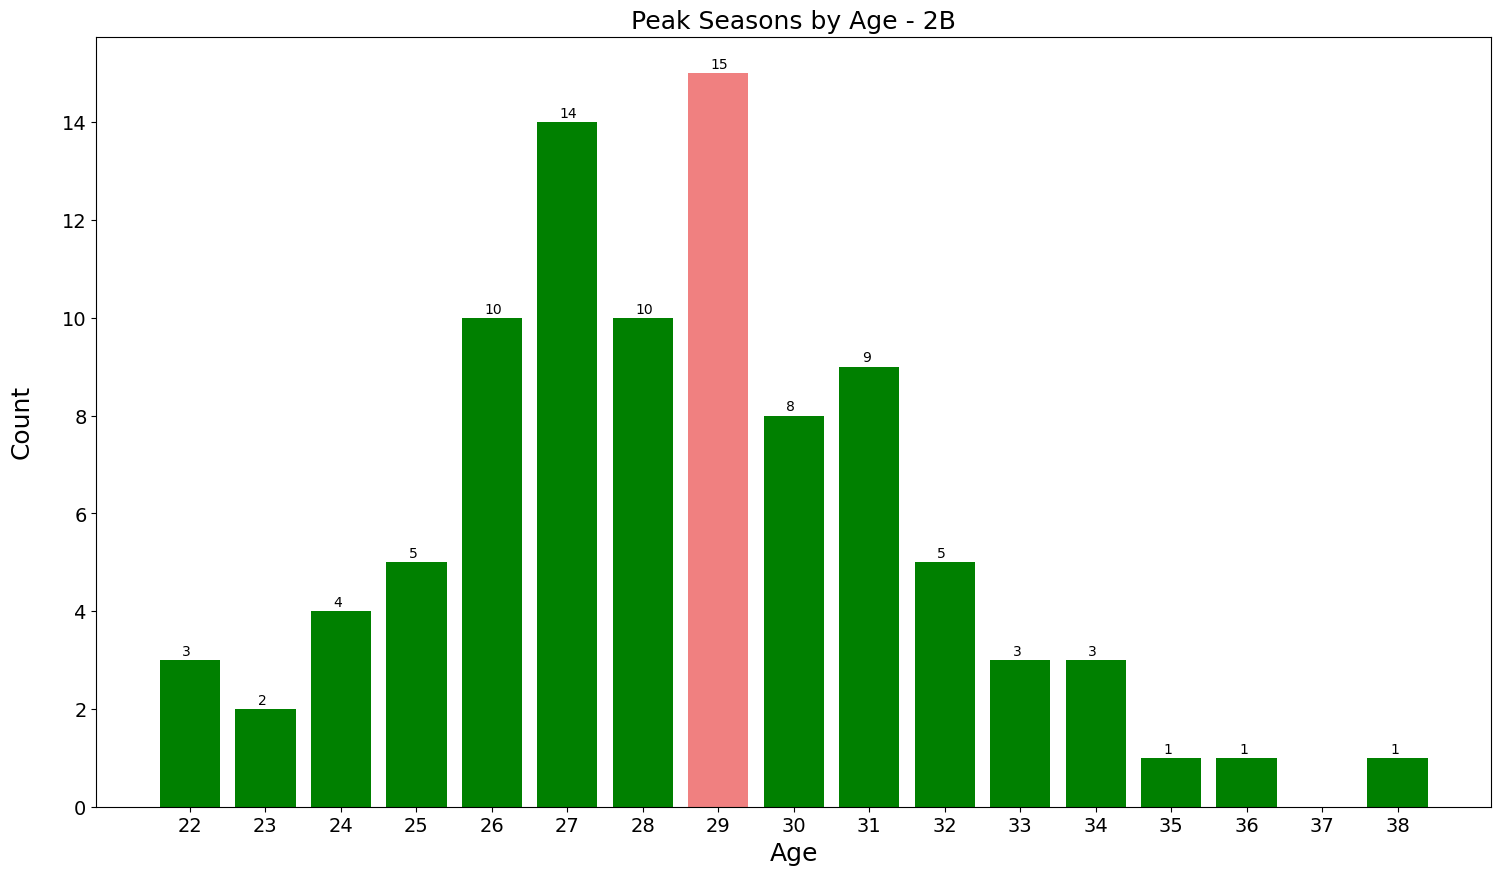

In [243]:
#plot 2B
fig = plt.figure(figsize=(18,10))
ax3 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='2B']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='2B']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='2B']['Age'],df_grp2[df_grp2['Position']=='2B']['Count'], label='Count', color=colors)
ax3.set_title('Peak Seasons by Age - 2B', fontsize=18)
ax3.set_xlabel('Age', fontsize=18)
ax3.set_ylabel('Count', fontsize=18, labelpad=20)
ax3.tick_params(axis='x',labelsize=14, rotation=0)
ax3.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax3.set_xticks(range(df_grp2[df_grp2['Position']=='2B']['Age'].min(),df_grp2[df_grp2['Position']=='2B']['Age'].max()+1))

plt.show()

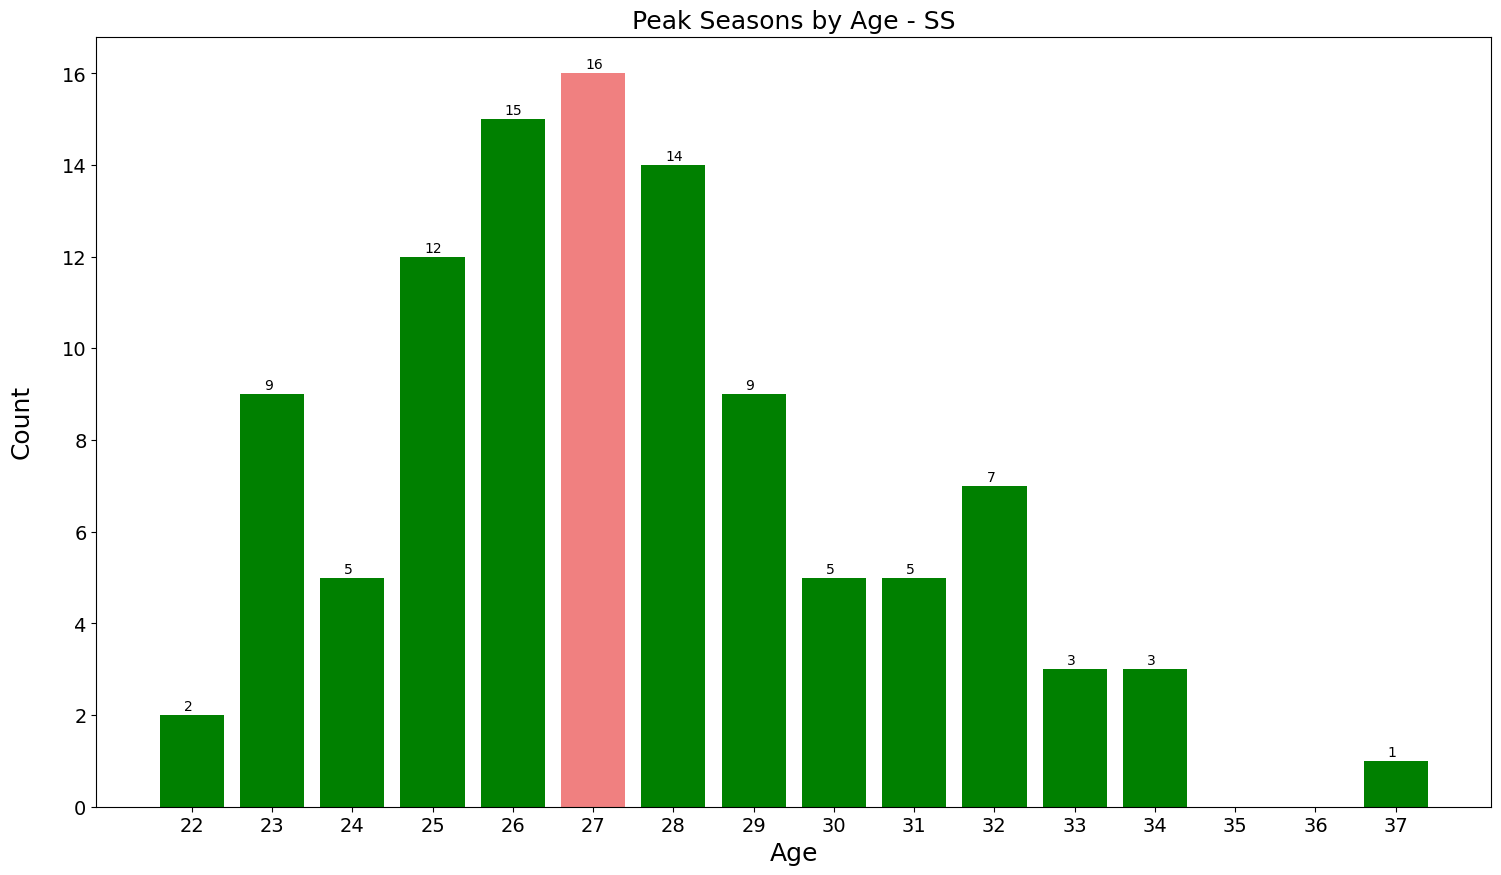

In [249]:
#plot SS
fig = plt.figure(figsize=(18,10))
ax4 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='SS']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='SS']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='SS']['Age'],df_grp2[df_grp2['Position']=='SS']['Count'], label='Count', color=colors)
ax4.set_title('Peak Seasons by Age - SS', fontsize=18)
ax4.set_xlabel('Age', fontsize=18)
ax4.set_ylabel('Count', fontsize=18, labelpad=20)
ax4.tick_params(axis='x',labelsize=14, rotation=0)
ax4.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax4.set_xticks(range(df_grp2[df_grp2['Position']=='SS']['Age'].min(),df_grp2[df_grp2['Position']=='SS']['Age'].max()+1))

plt.show()

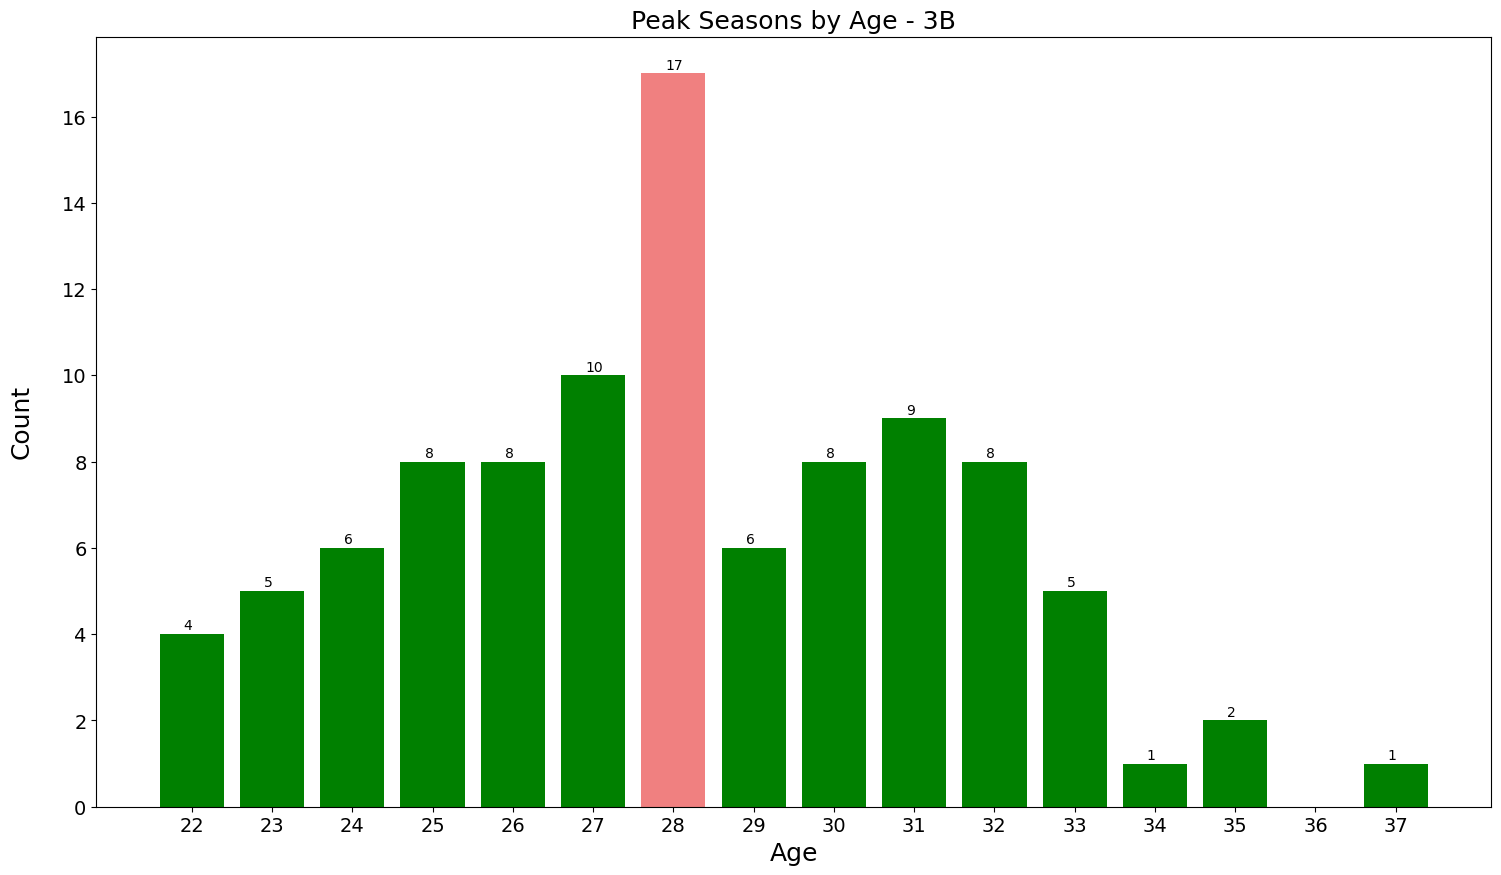

In [251]:
#plot 3B
fig = plt.figure(figsize=(18,10))
ax5 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='3B']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='3B']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='3B']['Age'],df_grp2[df_grp2['Position']=='3B']['Count'], label='Count', color=colors)
ax5.set_title('Peak Seasons by Age - 3B', fontsize=18)
ax5.set_xlabel('Age', fontsize=18)
ax5.set_ylabel('Count', fontsize=18, labelpad=20)
ax5.tick_params(axis='x',labelsize=14, rotation=0)
ax5.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax5.patches:
    ax5.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax5.set_xticks(range(df_grp2[df_grp2['Position']=='3B']['Age'].min(),df_grp2[df_grp2['Position']=='3B']['Age'].max()+1))

plt.show()

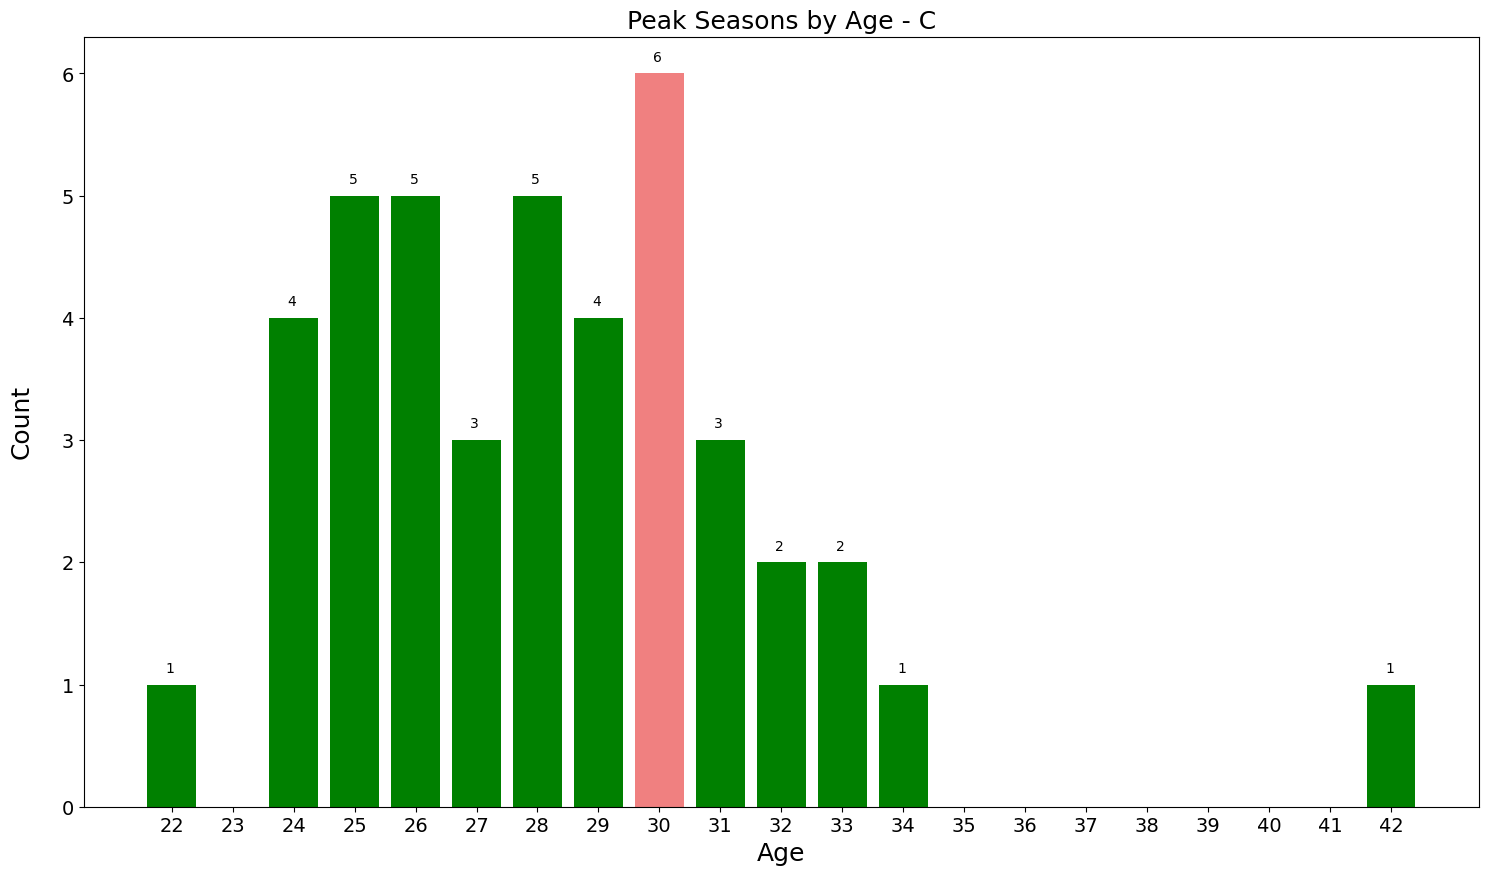

In [252]:
#plot C
fig = plt.figure(figsize=(18,10))
ax6 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='C']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='C']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='C']['Age'],df_grp2[df_grp2['Position']=='C']['Count'], label='Count', color=colors)
ax6.set_title('Peak Seasons by Age - C', fontsize=18)
ax6.set_xlabel('Age', fontsize=18)
ax6.set_ylabel('Count', fontsize=18, labelpad=20)
ax6.tick_params(axis='x',labelsize=14, rotation=0)
ax6.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax6.set_xticks(range(df_grp2[df_grp2['Position']=='C']['Age'].min(),df_grp2[df_grp2['Position']=='C']['Age'].max()+1))

plt.show()

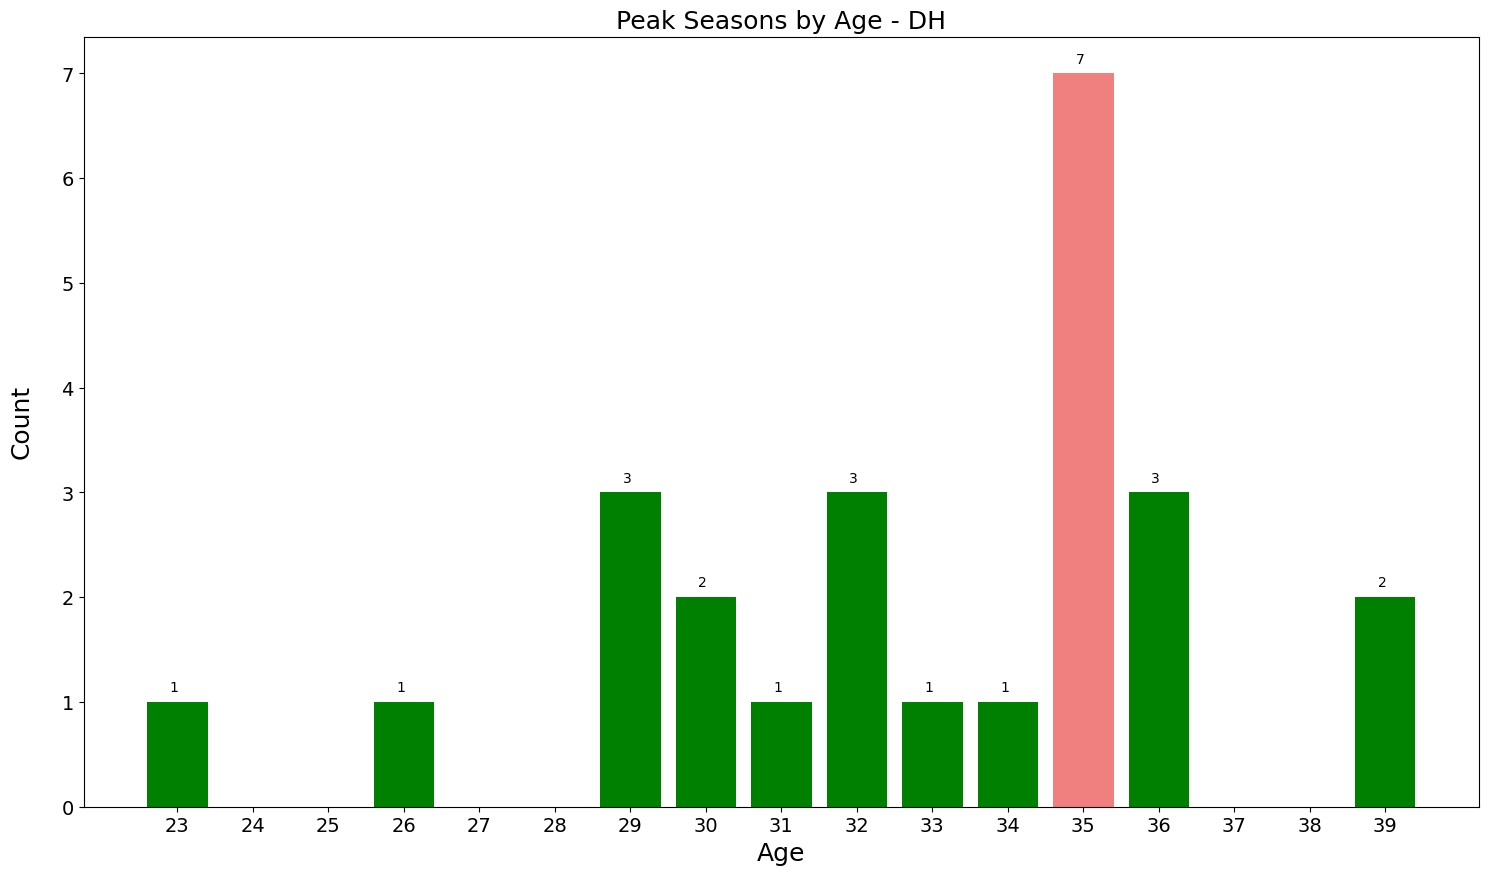

In [253]:
#plot DH
fig = plt.figure(figsize=(18,10))
ax7 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='DH']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='DH']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='DH']['Age'],df_grp2[df_grp2['Position']=='DH']['Count'], label='Count', color=colors)
ax7.set_title('Peak Seasons by Age - DH', fontsize=18)
ax7.set_xlabel('Age', fontsize=18)
ax7.set_ylabel('Count', fontsize=18, labelpad=20)
ax7.tick_params(axis='x',labelsize=14, rotation=0)
ax7.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax7.patches:
    ax7.annotate(str(p.get_height()), (p.get_x() + .3, p.get_height()+.1))
ax7.set_xticks(range(df_grp2[df_grp2['Position']=='DH']['Age'].min(),df_grp2[df_grp2['Position']=='DH']['Age'].max()+1))

plt.show()

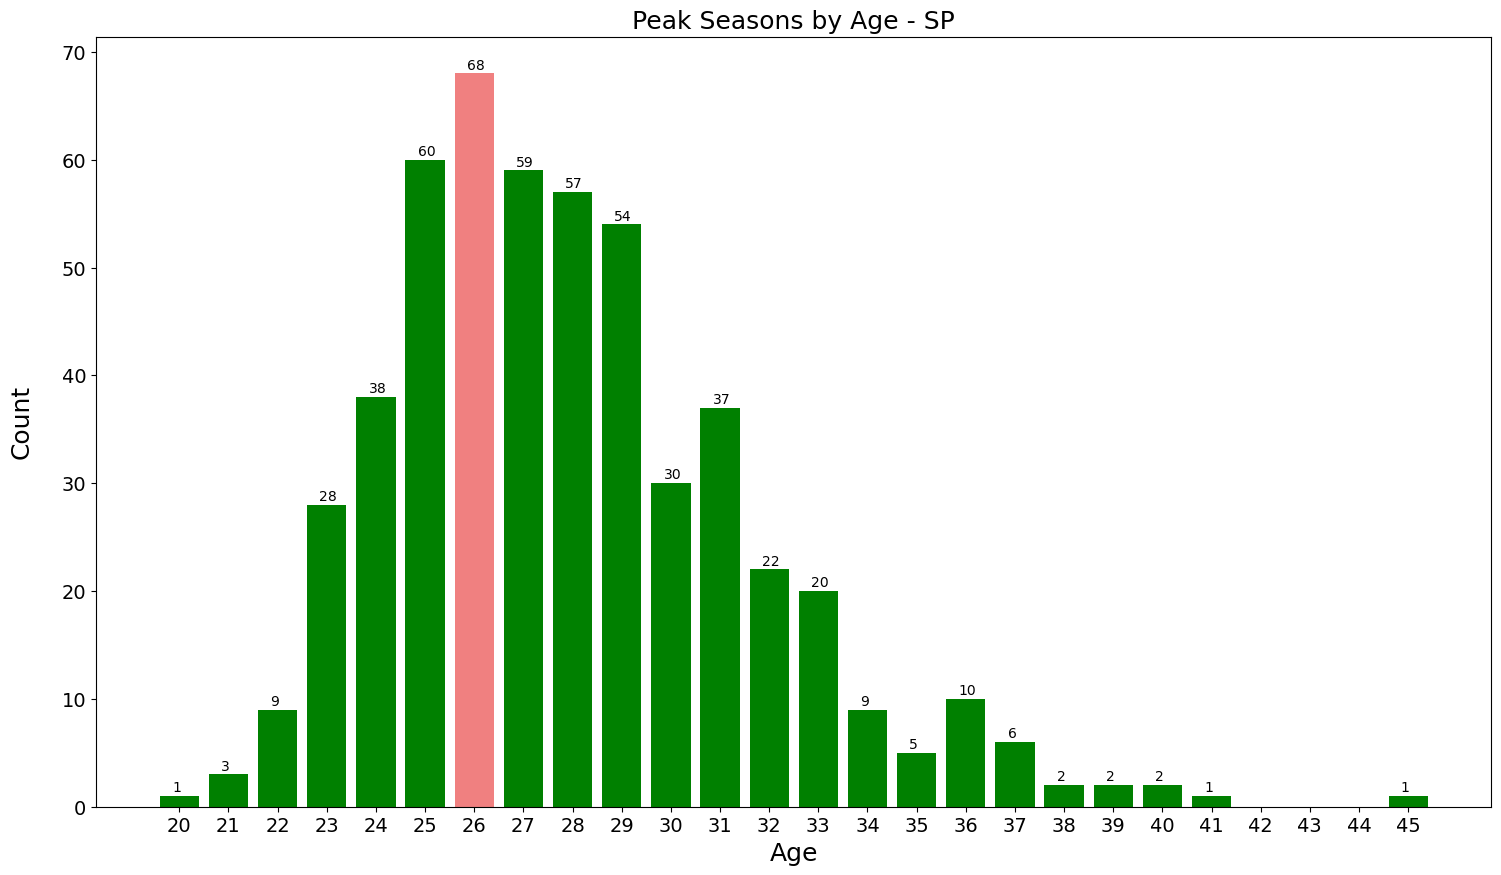

In [259]:
#plot SP
fig = plt.figure(figsize=(18,10))
ax8 = fig.add_subplot(1,1,1)
colors = ["lightcoral" if i == df_grp2[df_grp2['Position']=='SP']['Count'].max() else "green" for i in df_grp2[df_grp2['Position']=='SP']['Count']]
plt.bar(df_grp2[df_grp2['Position']=='SP']['Age'],df_grp2[df_grp2['Position']=='SP']['Count'], label='Count', color=colors)
ax8.set_title('Peak Seasons by Age - SP', fontsize=18)
ax8.set_xlabel('Age', fontsize=18)
ax8.set_ylabel('Count', fontsize=18, labelpad=20)
ax8.tick_params(axis='x',labelsize=14, rotation=0)
ax8.tick_params(axis='y',labelsize=14, rotation=0)
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x() + .25, p.get_height()+.4))
ax8.set_xticks(range(df_grp2[df_grp2['Position']=='SP']['Age'].min(),df_grp2[df_grp2['Position']=='SP']['Age'].max()+1))

plt.show()